In [1]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from indicators import find_pivots,donchian

In [2]:
#klines_file = './klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
klines_file = './klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)


In [14]:

class Strategy:
       
    def signal(self,df):
        
        """ Pivots
        df['ma'] = df['close'].rolling(window=21).mean()
        
        df = find_pivots(df, dev_threshold = 3.0)
        
        df['compra'] = (df['close'] < df['ma']) & (df['min_pivot'] > 0)
        df['venta']  = (df['close'] > df['ma']) & (df['max_pivot'] > 0)

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        """
        df = donchian(df)
        df['dch_amp'] = df['dch_max'] - df['dch_min']
        df['compra'] = (df['close'] < df['dch_mean']) & (df['dch_max'] == df['dch_max'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))
        df['venta']  = (df['close'] > df['dch_mean']) & (df['dch_amp'] == df['dch_amp'].shift(3)) & (df['dch_amp'].shift(2) > df['dch_amp'].shift(3))

        df['signal'] = np.where(df['compra'], 'COMPRA', 'NEUTRO')
        df['signal'] = np.where(df['venta'], 'VENTA',df['signal'])

        df['buy_price']  = np.where(df['compra'],df['close'],None)
        df['sell_price'] = np.where(df['venta'],df['close'],None)
        return df


<Axes: >

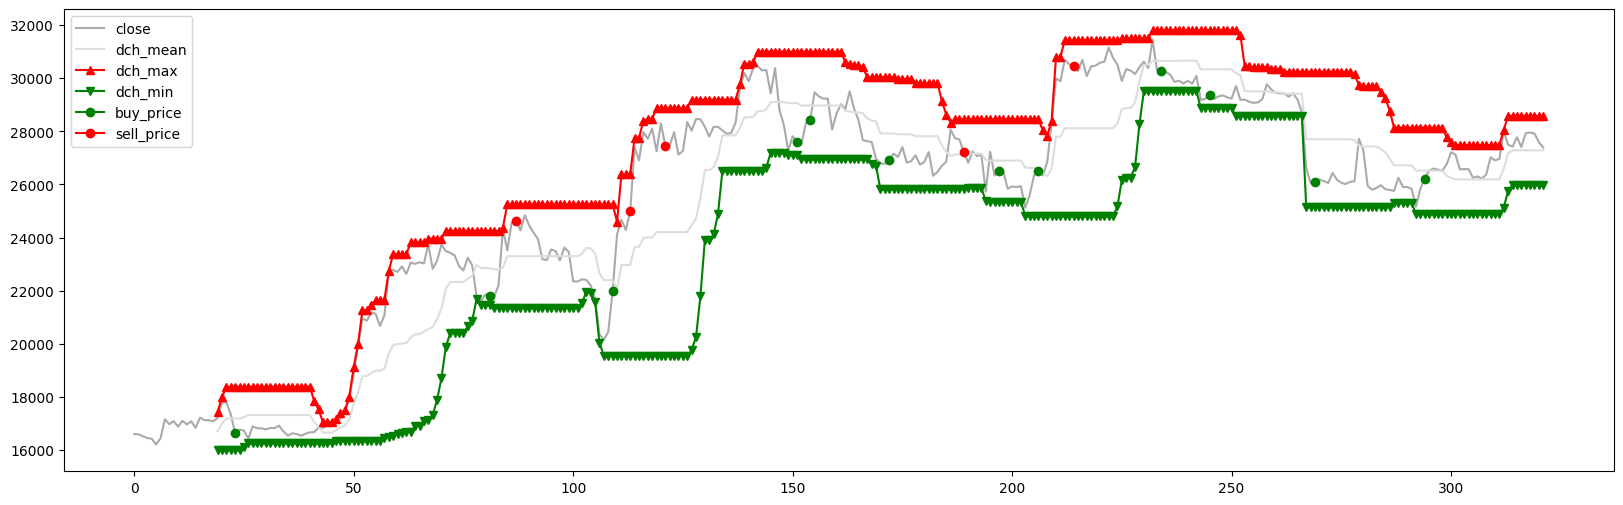

In [16]:

# Aplicar la función signal
df = Strategy().signal(df)

""" Pivots
df[['close','ma','max_pivot','min_pivot','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
"""
df[['close','dch_mean','dch_max','dch_min','buy_price','sell_price']].plot(figsize=(20,6),style=['#aaaaaa','#dddddd','r-^','g-v','g-o','r-o'])
